In [182]:

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, SGDRegressor, LassoLars, Lasso, Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [183]:
MODELS = {DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, SVR, NuSVR,
          LinearRegression, BayesianRidge, KNeighborsRegressor, XGBRegressor, XGBRFRegressor, RadiusNeighborsRegressor,
          ElasticNet, SGDRegressor, KernelRidge, LassoLars, Lasso, LinearSVR, Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor}


In [184]:
housing = pd.read_csv(r'./datasets/kc_house_data.csv').sample(10000)
quality = pd.read_csv(r'./datasets/winequality-red.csv')


In [185]:
housing


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17480,1525079056,20140502T000000,284000.0,3,1.75,1800,23103,1.0,0,0,...,7,1800,0,1968,0,98014,47.6517,-121.906,1410,18163
14753,5409800120,20140919T000000,312200.0,4,2.50,2910,8596,2.0,0,0,...,8,2910,0,2004,0,98003,47.2596,-122.304,2770,8602
7184,8645540290,20141126T000000,358000.0,5,2.50,2390,8775,1.0,0,0,...,7,1270,1120,1980,0,98058,47.4639,-122.170,1800,8000
20849,7137800310,20150225T000000,329950.0,4,2.50,2300,9690,2.0,0,0,...,8,2300,0,2006,0,98023,47.2793,-122.352,1200,9085
3599,6402700100,20141007T000000,488250.0,4,2.00,1830,9610,1.0,0,0,...,7,1830,0,1963,0,98033,47.6950,-122.176,1970,10754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,3352401476,20141124T000000,199988.0,2,1.00,860,5000,1.0,0,0,...,7,860,0,1949,0,98178,47.5005,-122.267,1130,6000
10080,3092000030,20140808T000000,270000.0,3,2.25,1470,16728,1.0,0,0,...,7,1350,120,1959,0,98168,47.4968,-122.302,1540,9000
19087,9476200580,20140710T000000,250000.0,3,1.00,1010,8711,1.0,0,0,...,6,1010,0,1944,0,98056,47.4914,-122.186,1250,8053
16127,3818700190,20141215T000000,387846.0,4,1.75,2520,15205,1.0,0,0,...,7,2040,480,1954,0,98028,47.7642,-122.264,1680,10000


In [186]:
quality


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [187]:
housing = housing.dropna()
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 17480 to 17752
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   date           10000 non-null  object 
 2   price          10000 non-null  float64
 3   bedrooms       10000 non-null  int64  
 4   bathrooms      10000 non-null  float64
 5   sqft_living    10000 non-null  int64  
 6   sqft_lot       10000 non-null  int64  
 7   floors         10000 non-null  float64
 8   waterfront     10000 non-null  int64  
 9   view           10000 non-null  int64  
 10  condition      10000 non-null  int64  
 11  grade          10000 non-null  int64  
 12  sqft_above     10000 non-null  int64  
 13  sqft_basement  10000 non-null  int64  
 14  yr_built       10000 non-null  int64  
 15  yr_renovated   10000 non-null  int64  
 16  zipcode        10000 non-null  int64  
 17  lat            10000 non-null  float64
 18  lo

In [188]:
quality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [189]:
def metrics(tt, tp, vt, vp, model,
            time=None): return {
    "model": model,
    'time': time,
    "mse": (mean_squared_error(tt, tp),
            mean_squared_error(vt, vp)),
    'r2': (r2_score(tt, tp),
           r2_score(vt, vp))
}


def create_model(X, y, model_name,
                 time_it: bool = False):
    model = Pipeline([
        ('scaler1', RobustScaler()),
        ('scaler2', MinMaxScaler()),
        ('model', model_name())
    ])
    if time_it == True:
        begin = time.time()
        model.fit(X, y)
        end = time.time()
        return (model, end - begin)
    return model.fit(X, y)


def get_metrics(X, y, model_name):
    Xt, Xv, yt, yv = train_test_split(
        X, y, train_size=.7)
    results = create_model(Xt, yt, model_name, time_it=True)
    model, time = results[0], results[1]
    return metrics(
        yt, model.predict(Xt), yv,
        model.predict(Xv), model_name, time)


def get_results(X, y, models):
    results = []
    for i in models:
        try:
            results.append(get_metrics(X, y, i))
        except:
            pass
    return results


def plot_results(results: 'list[dict]'):
    y = [i['model'] for i in results]
    pos = np.arange(len(y))
    plt.barh(pos, [i['mse'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('MSE Validation')
    plt.show()
    plt.barh(pos, [i['mse'][0] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('MSE Traning')
    plt.show()
    plt.barh(pos, [i['time'] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Time')
    plt.show()
    plt.barh(pos, [i['r2'][1] for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('R2')
    plt.show()
    plt.barh(pos, [i['time'] * i['mse'][1] * -
             1 for i in results], align='center',)
    plt.yticks(pos, y)
    plt.title('Efficiency (Higher the better)')
    plt.show()
    plt.barh(pos, [-1 * i['time'] * i['mse'][1] / (i['mse']
             [1] - i['mse'][0]) for i in results], align='center')
    plt.yticks(pos, y)
    plt.title('Weighted Efficiency (Higher the better)')
    plt.show()


In [190]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 17480 to 17752
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   date           10000 non-null  object 
 2   price          10000 non-null  float64
 3   bedrooms       10000 non-null  int64  
 4   bathrooms      10000 non-null  float64
 5   sqft_living    10000 non-null  int64  
 6   sqft_lot       10000 non-null  int64  
 7   floors         10000 non-null  float64
 8   waterfront     10000 non-null  int64  
 9   view           10000 non-null  int64  
 10  condition      10000 non-null  int64  
 11  grade          10000 non-null  int64  
 12  sqft_above     10000 non-null  int64  
 13  sqft_basement  10000 non-null  int64  
 14  yr_built       10000 non-null  int64  
 15  yr_renovated   10000 non-null  int64  
 16  zipcode        10000 non-null  int64  
 17  lat            10000 non-null  float64
 18  lo

In [191]:
quality_X = quality.drop(['quality'], axis=1)
quality_y = quality['quality']
housing_X = housing\
    .drop(['id', 'date', 'zipcode',
           'lat', 'long', 'price'], axis=1)
housing_y = housing['price']


In [192]:
housing_y


17480    284000.0
14753    312200.0
7184     358000.0
20849    329950.0
3599     488250.0
           ...   
16551    199988.0
10080    270000.0
19087    250000.0
16127    387846.0
17752    799000.0
Name: price, Length: 10000, dtype: float64

In [193]:
quality_results, housing_results = get_results(
    quality_X, quality_y, MODELS), get_results(
    housing_X, housing_y, MODELS)


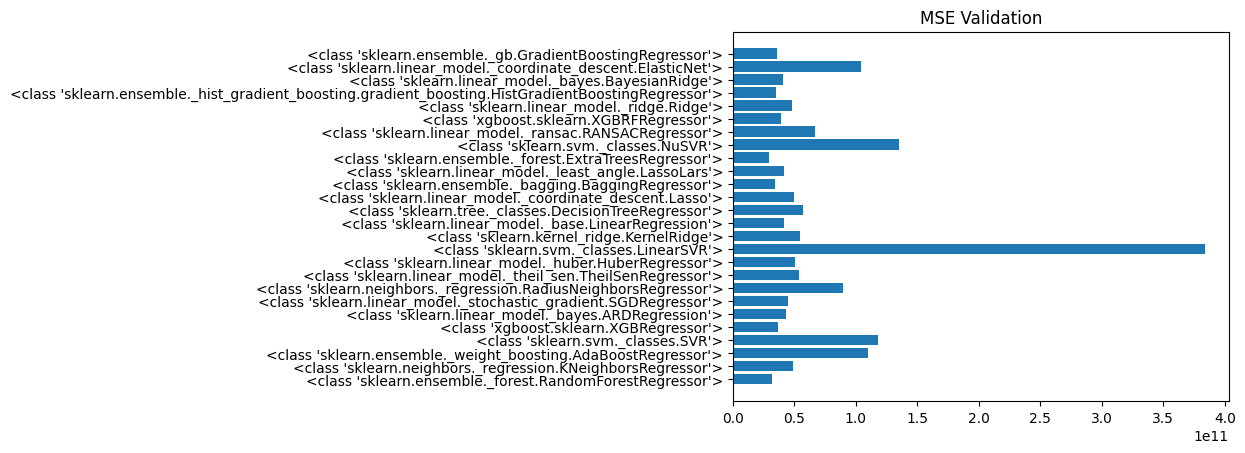

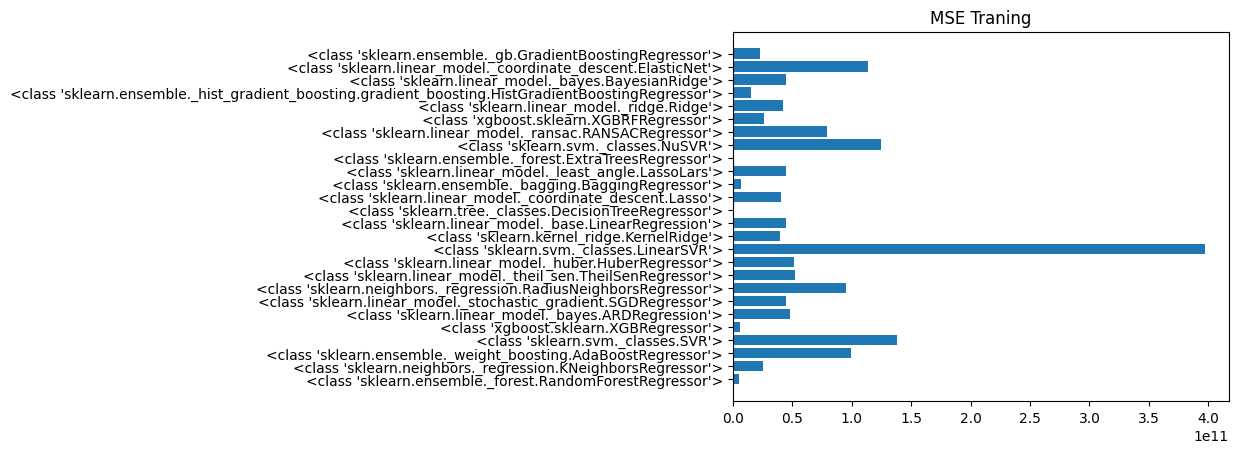

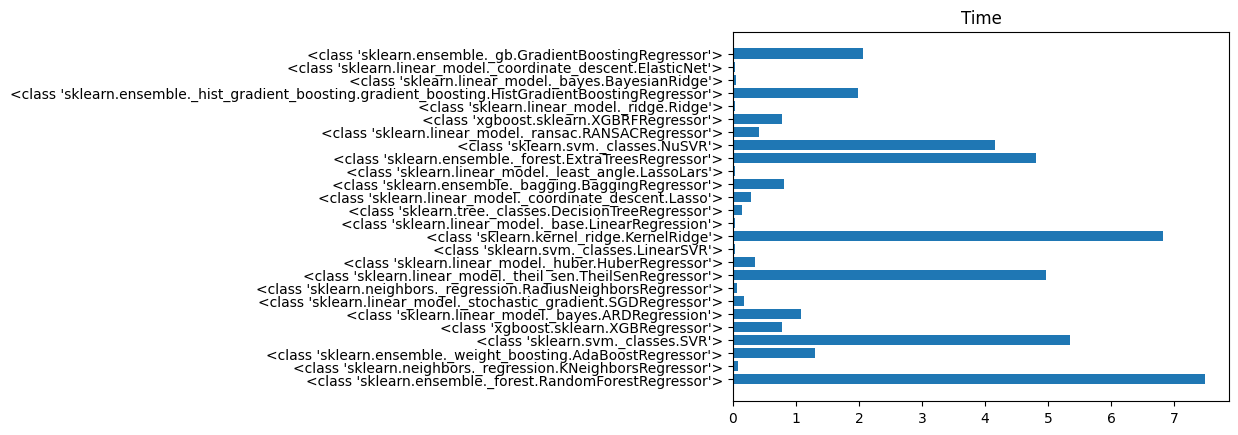

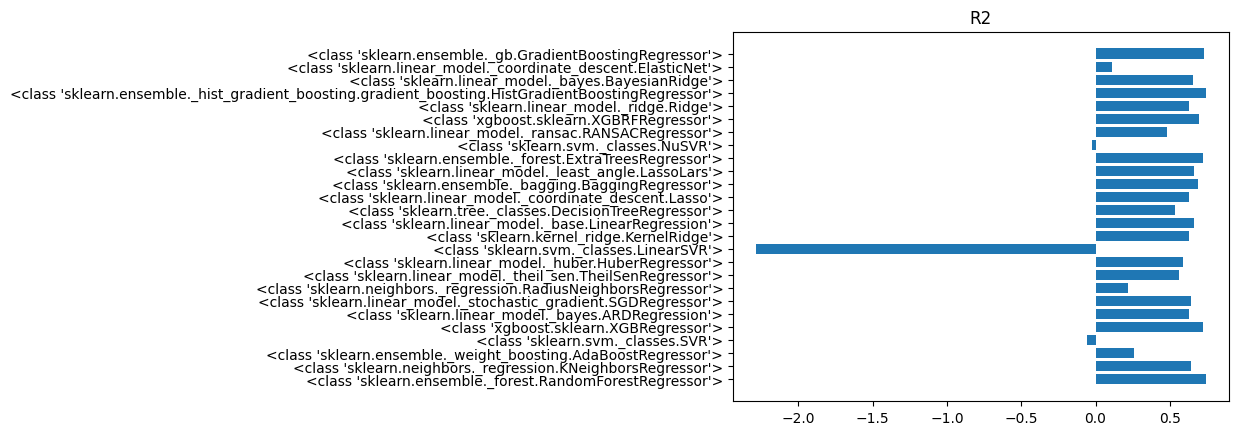

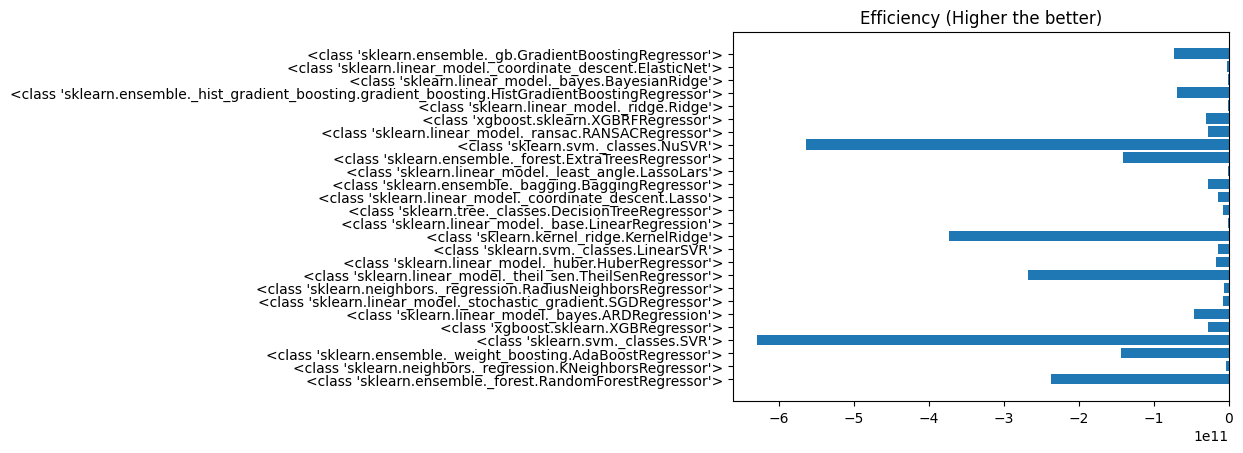

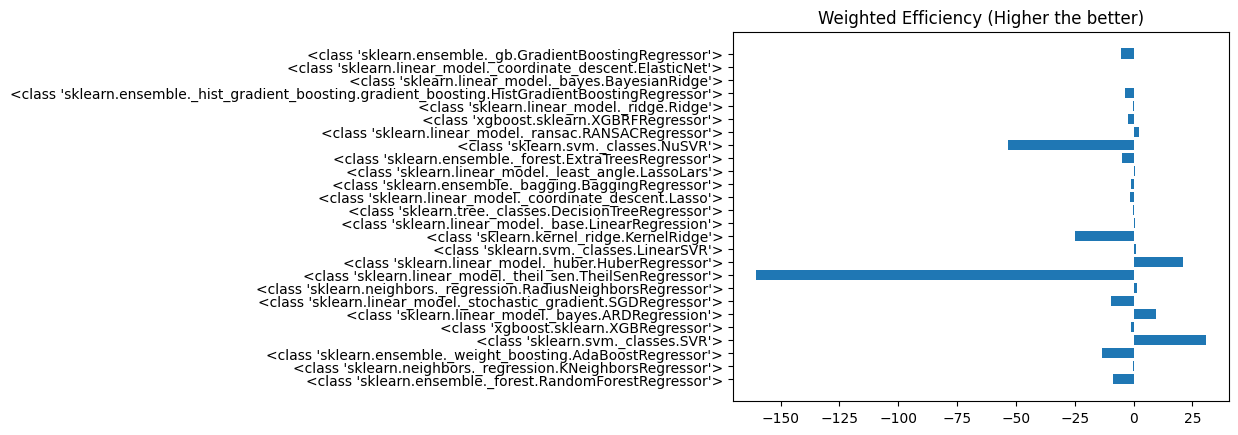

In [194]:
plot_results(housing_results)


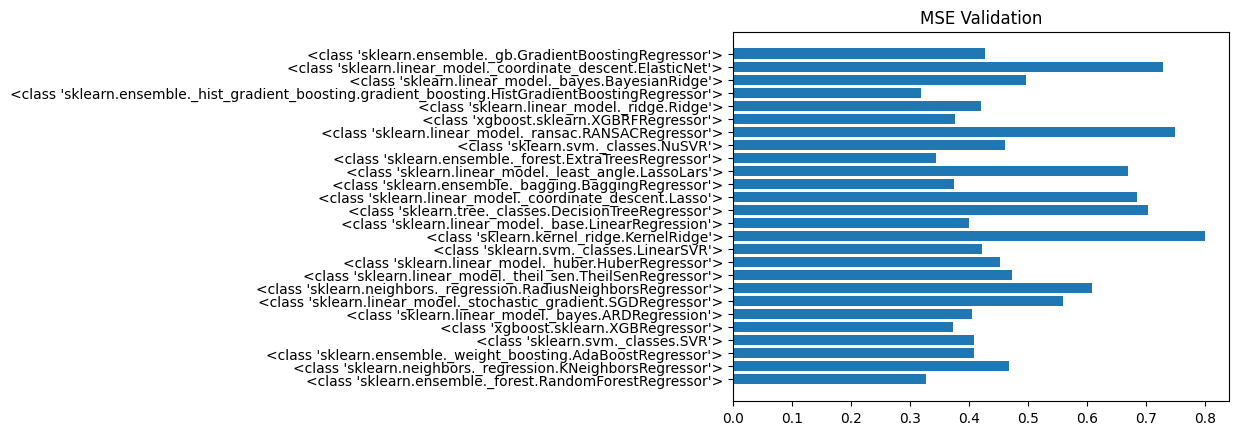

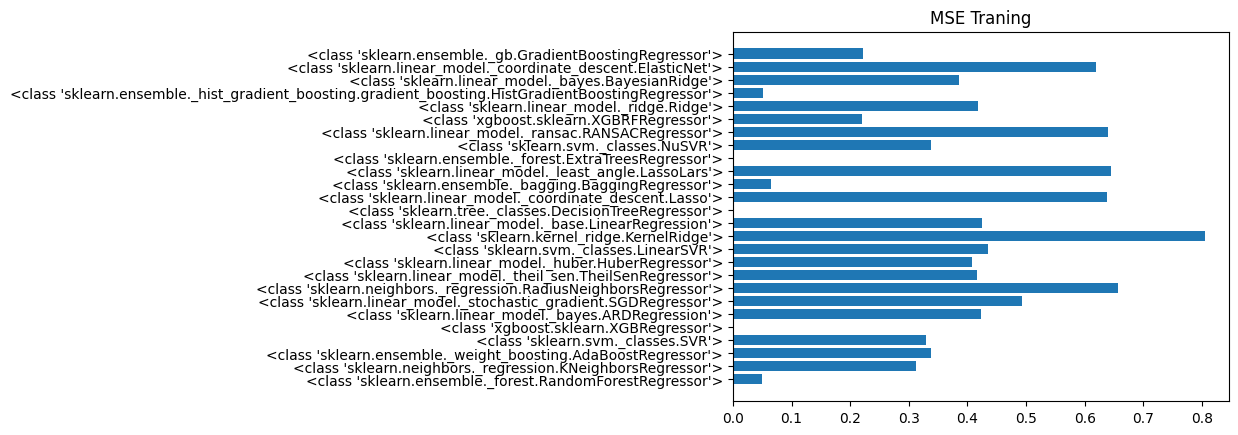

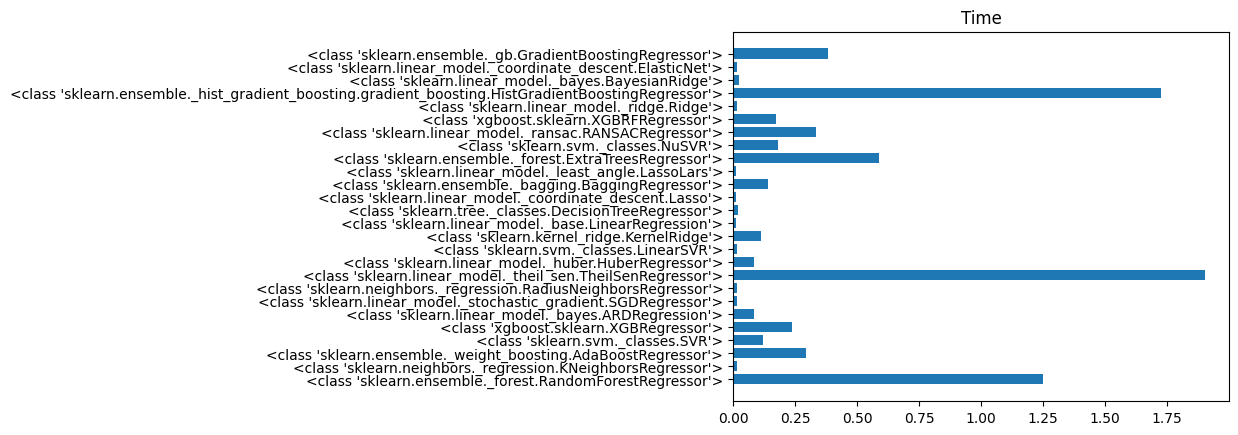

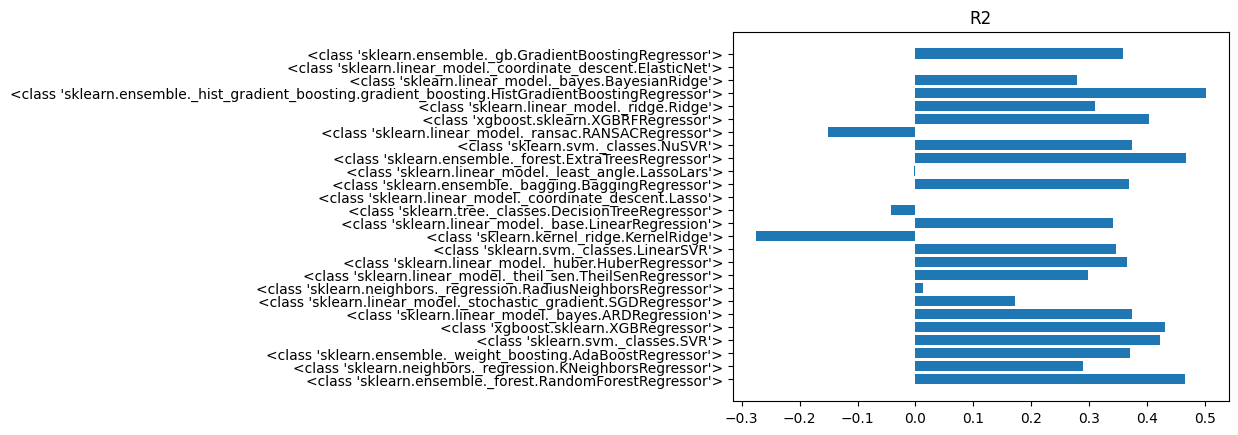

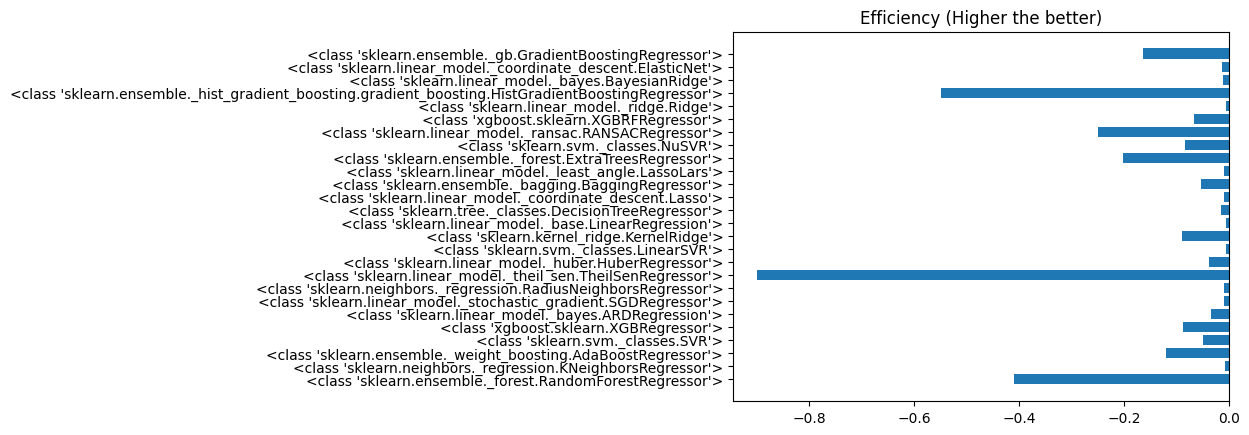

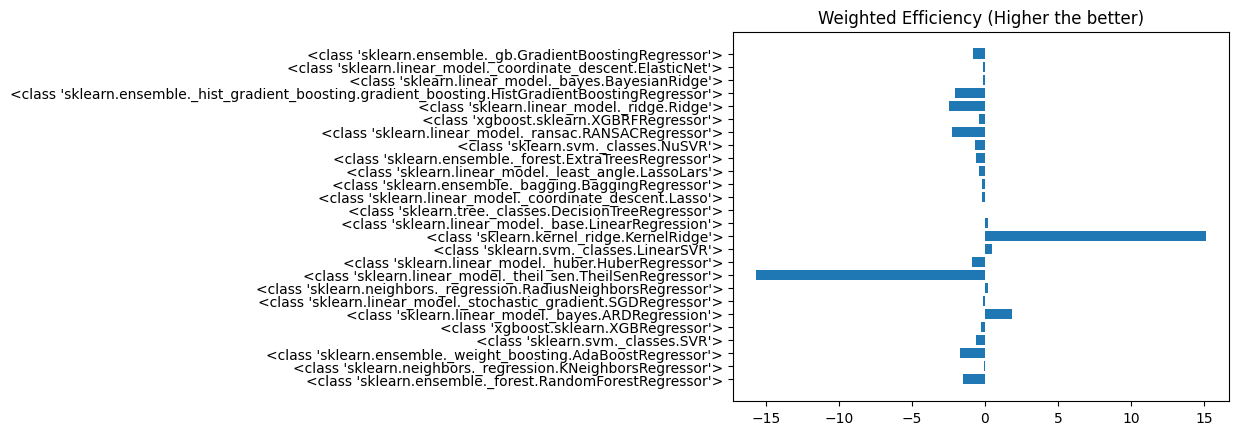

In [195]:
plot_results(quality_results)


In [196]:


import numpy as np
import pandas as pd
from numba import prange
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, SGDRegressor, LassoLars, Lasso, Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import time
import math


class VGBRegressor(object):
    def __init__(
        self,
        *,
        learning_rate: float = 0.05,
        n_estimators: int = 100,
        custom_loss=None,
        early_stopping: bool = False,
        early_stopping_min_delta: float = 0.001,
        early_stopping_patience: int = 10,
        complexity: bool = False,
        custom_models: list = None
    ):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.custom_loss = custom_loss
        self.early_stopping = early_stopping
        self._X = None
        self._y = None
        if custom_models:
            self._models = custom_models
        else:
            if complexity:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor, ExtraTreesRegressor,
                                RadiusNeighborsRegressor, ElasticNet, LassoLars, Lasso, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor,
                                BaggingRegressor, SVR, NuSVR, XGBRegressor, XGBRFRegressor, SGDRegressor, KernelRidge, MLPRegressor,
                                Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor)
            else:
                self._models = (DecisionTreeRegressor, LinearRegression, BayesianRidge, KNeighborsRegressor,
                                RadiusNeighborsRegressor, ElasticNet, LassoLars, Lasso, SGDRegressor, BaggingRegressor,
                                Ridge, ARDRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor)
        self._ensemble = []

    def _metrics(self, vt, vp, model, time=None):
        if self.custom_loss:
            return {'model': model, 'time': time, 'loss': self.custom_loss(vt, vp)}
        return {"model": model, "time": time, "loss": mean_absolute_error(vt, vp)}

    def _create_model(self, X, y, model_name, time_it: bool = False):
        model = Pipeline([
            ('scaler1', RobustScaler()),
            ('model', model_name())
        ])
        if time_it:
            begin = time.time()
            model.fit(X, y)
            end = time.time()
            return (model, end - begin)
        return (model.fit(X, y), None)

    def _get_metrics(self, X, y, model_name):
        Xt, Xv, yt, yv = train_test_split(X, y)
        results = self._create_model(Xt, yt, model_name, time_it=False)
        model, time = results[0], results[1]
        return self._metrics(yv,
                             model.predict(Xv), model, time)

    def _get_results(self, X, y) -> list:
        results = []
        for i in self._models:
            try:
                results.append(self._get_metrics(X, y, i))
            except:
                pass
        return results

    def fit(self, X_train, y_train):
        # base model: mean
        # computer residuals: y - y hat
        # for n_estimators: a) y = prev residuals && residuals * learning rate
        # add early stopping
        # restore best weights
        # ada boost and adaptive scaling for learning rates

        preds = pd.DataFrame(
            data={'p0': np.full((len(y_train)), y_train.mean(skipna=True))})
        residuals = pd.DataFrame(
            data={'r0': y_train - y_train.mean(skipna=True)})

        for i in prange(1, self.n_estimators + 1):
            y = residuals[f'r{i - 1}']
            results = self._get_results(X_train, y)
            min_loss = min(results, key=lambda d: d.get(
                "loss", float('inf')))["loss"]  # https://stackoverflow.com/a/19619294
            min_model = [i['model']
                         for i in results if min_loss >= i['loss']][0]
            residuals[f'r{i}'] = min_model.predict(
                X_train) * self.learning_rate
            # return results, min_model
            X_train[f'r{i}'] = residuals[f'r{i - 1}']
            self._ensemble.append(min_model)
        return self._ensemble, residuals


In [151]:
import warnings
warnings.filterwarnings("ignore")


In [152]:
model = VGBRegressor(n_estimators=50, complexity=True)


In [153]:
model.fit(quality_X, quality_y)


([Pipeline(steps=[('scaler1', RobustScaler()), ('model', ExtraTreesRegressor())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', HuberRegressor())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', RANSACRegressor())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', RANSACRegressor())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScaler()), ('model', LinearRegression())]),
  Pipeline(steps=[('scaler1', RobustScale

In [155]:
import inspect
from sklearn import all_estimators
regressors = all_estimators(type_filter='regressor')


ImportError: cannot import name 'all_estimators' from 'sklearn' (c:\Users\Admin\Desktop\aitfdl\variational-gradient-boosting\env\lib\site-packages\sklearn\__init__.py)